# Nathan Thomas
## SDEV220
### Module 04 Programming Assignment - Modules and Databases

## Exercise 11.1
> Create a file called *zoo.py*. In it, define a function called **hours()** that prints the string *'Open 9-5 daily'*. Then, use the interactive interpreter to import the *zoo* codule and call it's **hours()** function. 

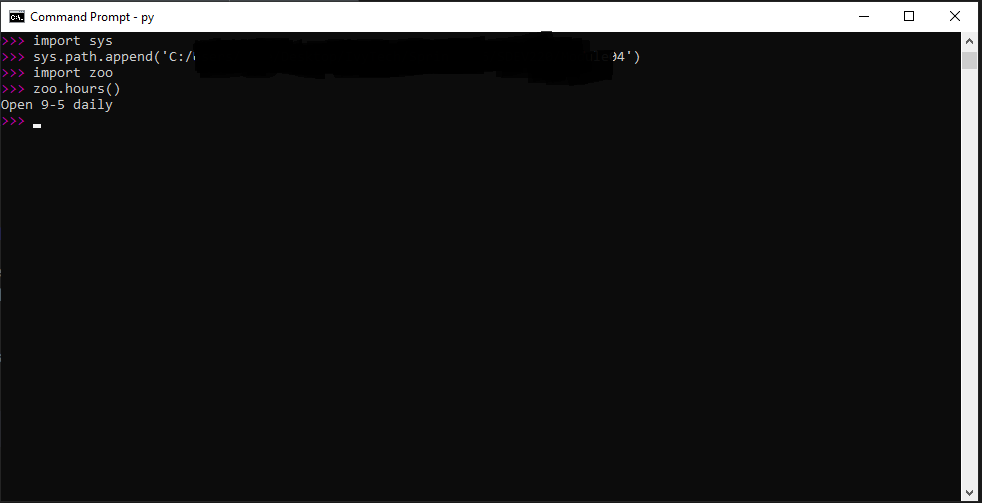

In [1]:
from IPython.display import Image, display

display(Image(filename = '../Images/Exercise11.1.png'))


## Exercise 11.2
> In the interactive interpreter, import the *zoo* module as *menagerie* and call its **hours()** function.

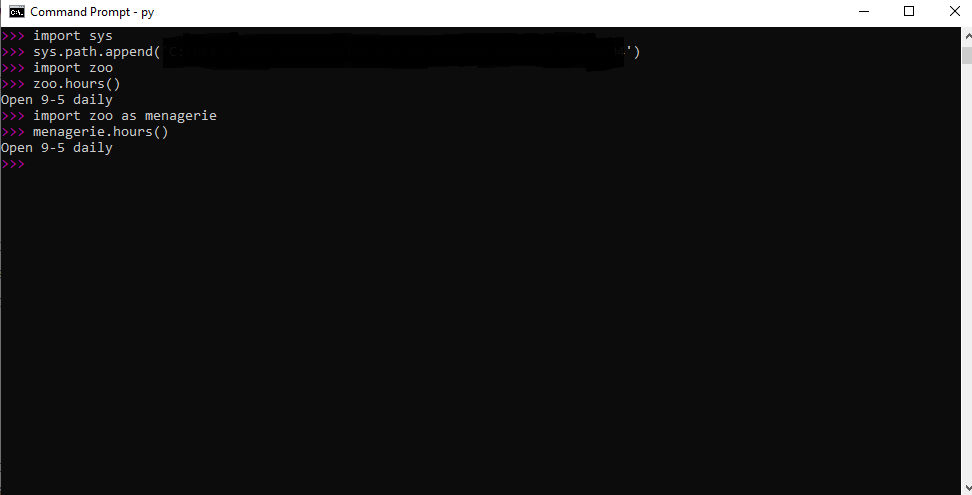

In [2]:
display(Image(filename = '../Images/Exercise11.2.png'))

## Exercise 16.8
> Use *sqlalchemy* module to connect to the sqlite3 database *books.db* that you just made in exercise 16.4. As in 16.6, select and pint the **title** column from the **book** table in alphabetical order.

In [ ]:
import sqlalchemy as sa


engine = sa.create_engine('sqlite:///books.sqlite3')
conn = engine.connect()

try:
    books = conn.execute(sa.text("SELECT title FROM book ORDER BY title"))
    # I am just printing these to have a better understanding of what is happening
    # behind the scenes.
    print(conn)
    print(f'{books}\n')

    print('Here are the titles in alphabetical order:\n')

    for book in books:
        for title in book:
            print(title)

finally:
    conn.close()
# books = conn.execute(books.select())



Here are the titles in alphabetical order:

Perdido Street Station
Small Gods
The Spellman Files
The Weirdstone of Brisingamen
Thud!


I found that sqlalchemy's scalars() method will print the first index and strip the ()s

In [ ]:
import sqlalchemy as sa

engine = sa.create_engine('sqlite:///books.sqlite3')
conn = engine.connect()

try:
    books = conn.execute(sa.text("SELECT title FROM book ORDER BY title"))
    
    print('Here are the titles in alphabetical order:\n')
    print(*books.scalars(), sep='\n')

finally:
    conn.close()

Here are the titles in alphabetical order:

Perdido Street Station
Small Gods
The Spellman Files
The Weirdstone of Brisingamen
Thud!


If I needed to identify a specific column, in the table, I could use this approach instead.

In [47]:
import sqlalchemy as sa


engine = sa.create_engine('sqlite:///books.sqlite3')
conn = engine.connect()

try:
    books = conn.execute(sa.text("SELECT title FROM book ORDER BY title"))
    
    print('Here are the titles in alphabetical order:\n')
    print(*(row.title for row in books), sep='\n')

finally:
    conn.close()

Here are the titles in alphabetical order:

Perdido Street Station
Small Gods
The Spellman Files
The Weirdstone of Brisingamen
Thud!


The second an third methods are a little cleaner and less verbose. I thought it was a cool idea to learn how to condense my code. 

The try - finally statement ensures that the connection is closed whether successful or not. I do understand that I could use a **with** clause for a more condensed code, but I wanted to learn the syntax for manually closing the connection. 